In [1]:
# Import all necessary libraries
import pandas     as pd   # The data processing library
import matplotlib as plot # The visualization library
import json               # Library for encoding and decoding JSON data

In [2]:
# Load GeoJSON directly in a data frame
bad_geo_df = pd.read_json("../datasets/connectivity_2015_09.geojson")
bad_geo_df.head()

,features,type
0,"{u'geometry': {u'type': u'LineString', u'coord...",FeatureCollection
1,"{u'geometry': {u'type': u'LineString', u'coord...",FeatureCollection
2,"{u'geometry': {u'type': u'LineString', u'coord...",FeatureCollection
3,"{u'geometry': {u'type': u'LineString', u'coord...",FeatureCollection
4,"{u'geometry': {u'type': u'LineString', u'coord...",FeatureCollection


In [3]:
# Load JSON and normalize nested JSON
with open("../datasets/connectivity_2015_09.geojson") as f:
    geo_data = json.load(f)

tmp_df = pd.DataFrame(geo_data)
geo_df = pd.io.json.json_normalize(tmp_df['features'])
geo_df.head()

,geometry.coordinates,geometry.type,"properties.all,no4g_measurements","properties.all,no4g_stability",properties.all_measurements,properties.all_stability,"properties.e-plus,no4g_measurements","properties.e-plus,no4g_stability",properties.e-plus_measurements,properties.e-plus_stability,...,properties.o2_stability,"properties.t-mobile,no4g_measurements","properties.t-mobile,no4g_stability",properties.t-mobile_measurements,properties.t-mobile_stability,"properties.vodafone,no4g_measurements","properties.vodafone,no4g_stability",properties.vodafone_measurements,properties.vodafone_stability,type
0,"[[11.06535, 49.44201], [11.07071, 49.4427], [1...",LineString,567,0.974,1157,0.961,94,0.981,112,0.981,...,0.979,188,0.971,437,0.929,205,0.980,364,0.981,Feature
1,"[[11.0718650022, 49.4429816674], [11.07228, 49...",LineString,1154,0.973,2161,0.954,150,0.974,185,0.974,...,0.968,418,0.976,896,0.924,448,0.979,751,0.977,Feature
2,"[[11.0779766624, 49.4447023689], [11.07897, 49...",LineString,1569,0.973,2818,0.947,160,0.968,208,0.967,...,0.959,618,0.980,1274,0.918,621,0.978,991,0.975,Feature
3,"[[11.0844614667, 49.4457747006], [11.0882, 49....",LineString,1289,0.972,2370,0.934,112,0.960,155,0.959,...,0.957,497,0.981,1131,0.895,534,0.977,814,0.975,Feature
4,"[[11.0908624199, 49.4470433591], [11.09168, 49...",LineString,594,0.974,1282,0.888,48,0.961,71,0.964,...,0.964,213,0.980,697,0.817,248,0.980,371,0.978,Feature


In [4]:
# List the column headers
list(geo_df.columns.values)

['geometry.coordinates',
 'geometry.type',
 'properties.all,no4g_measurements',
 'properties.all,no4g_stability',
 'properties.all_measurements',
 'properties.all_stability',
 'properties.e-plus,no4g_measurements',
 'properties.e-plus,no4g_stability',
 'properties.e-plus_measurements',
 'properties.e-plus_stability',
 'properties.o2,no4g_measurements',
 'properties.o2,no4g_stability',
 'properties.o2_measurements',
 'properties.o2_stability',
 'properties.t-mobile,no4g_measurements',
 'properties.t-mobile,no4g_stability',
 'properties.t-mobile_measurements',
 'properties.t-mobile_stability',
 'properties.vodafone,no4g_measurements',
 'properties.vodafone,no4g_stability',
 'properties.vodafone_measurements',
 'properties.vodafone_stability',
 u'type']

In [10]:
# Let's examine the coordinate
print geo_df['geometry.coordinates'][0], "\n"
print geo_df['geometry.coordinates'][1], "\n"
print geo_df['geometry.coordinates'][2], "\n"

[[11.06535, 49.44201], [11.07071, 49.4427], [11.07126, 49.4428], [11.07177, 49.44295], [11.071865002158022, 49.44298166738601]] 

[[11.071865002158022, 49.44298166738601], [11.07228, 49.44312], [11.07278, 49.44331], [11.07325, 49.44349], [11.07425, 49.44383], [11.0747, 49.444], [11.07569, 49.44429], [11.0762, 49.44441], [11.07675, 49.4445], [11.07731, 49.44461], [11.077976662356802, 49.44470236888076]] 

[[11.077976662356802, 49.44470236888076], [11.07897, 49.44484], [11.08006, 49.44496], [11.08115, 49.44511], [11.08223, 49.4453], [11.084461466732163, 49.44577470062812]] 



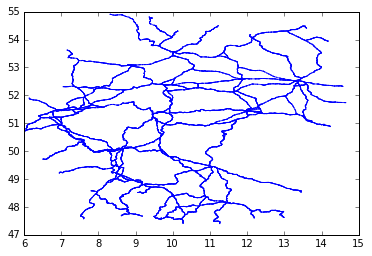

In [28]:
# We can import a module wherever we want
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection
import numpy as np
%matplotlib inline

# Initialize a collection of Polygons
fig, ax = plt.subplots()

coll = PolyCollection(geo_df['geometry.coordinates'], 
                      cmap=mpl.cm.jet,
                      edgecolors='none',
                      zorder=2,
                      color='blue')

ax.add_collection(coll)
ax.autoscale_view()
plt.show()